# Statictics, Project \#2: Olympic Games within last 120 years
by Polina Guseva

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### task\#1: combine files and write a custom function for coming events

In [47]:
import os

In [48]:
def combiner(path_to_folder, extension):
  os.chdir(path_to_folder)
  extension_checker = {'csv': pd.read_csv, 'pickle': pd.read_pickle, 'fwf': pd.read_fwf,
                       'clipboard': pd.read_clipboard, 'excel': pd.read_excel,
                       'json': pd.read_json, 'html': pd.read_html, 'xml': pd.read_xml,
                       'hdf': pd.read_hdf, 'feather': pd.read_feather,
                       'parquet': pd.read_parquet, 'orc': pd.read_orc,
                       'sas': pd.read_sas, 'spss': pd.read_spss, 'sql': pd.read_sql,
                       'sql_table': pd.read_sql_table, 'sql_query': pd.read_sql_query}
  df_list = [extension_checker[extension](file) for file in os.listdir()]
  # check for any column mismatches
  checker = []
  for i in range(len(df_list) - 1):
    checker.append((df_list[i].columns == df_list[i+1].columns).all())
  if all(checker):
    return pd.concat(df_list)
  else:
    return 'Your columns are not equal'

In [86]:
df = combiner("/content/raw_data", 'csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,NaN


### task \#2: manage possible outliers

In [50]:
# now let's have a look into data and some bugs
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [51]:
# firstly, let's explore numeric data
df.describe()

,ID,Age,Height,Weight,Year
count,477276.000000,467800.000000,417104.000000,414400.000000,477266.000000
mean,68407.344352,25.336347,175.355669,70.695408,1983.257764
std,39011.542815,6.022690,10.535285,14.344735,26.710233
min,1.000000,10.000000,127.000000,7.000000,1896.000000
25%,34887.000000,21.000000,168.000000,60.000000,1968.000000
50%,68395.000000,24.000000,175.000000,70.000000,1988.000000
75%,102186.250000,28.000000,183.000000,79.000000,2004.000000
max,135571.000000,240.000000,340.000000,214.000000,2016.000000


Text(0.5, 1.0, 'Physical parameters at Olympics 1896-2016: raw data')

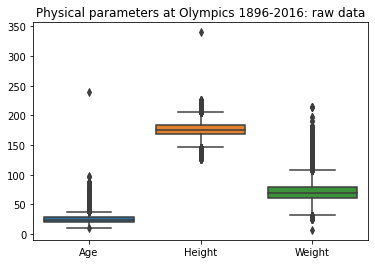

In [52]:
# as we can see there are some inhumane outliers
sns.boxplot(data=df.loc[:, ['Age', 'Height', 'Weight']])
plt.title('Physical parameters at Olympics 1896-2016: raw data')

❌WARNING❌ 

I don't know why but my filter cuts more data than is needed. Please, be aware of that during the grading

In [53]:
len(df.query('(Height < 272) & (Weight > 9) & (Age < 125)'))

412322

Text(0.5, 1.0, 'Physical parameters at Olympics 1896-2016: corrected')

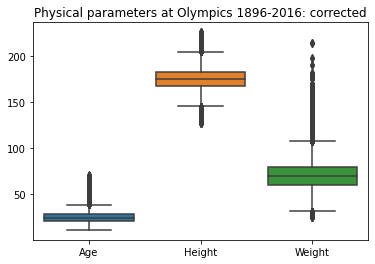

In [54]:
# based on the World's record: the heighest person on Earth was 272 cm tall,
# the youngest ever Olympic athlete was 10, and the oldest human died at the age of 125,
# a human being of ~6 months weights ~7 kg
df = df[(df['Height'] < 272) & (df['Weight'] > 9) & (df['Age'] < 125)]

sns.boxplot(data=df.loc[:, ['Age', 'Height', 'Weight']])
plt.title('Physical parameters at Olympics 1896-2016: corrected')

In [55]:
# let's have a look now: yeap, now it looks give or take decent
df.describe()

,ID,Age,Height,Weight,Year
count,412322.000000,412322.000000,412322.000000,412322.000000,412316.000000
mean,68615.802727,25.055466,175.371947,70.688515,1989.674483
std,38996.453974,5.483130,10.546175,14.340563,20.130910
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [56]:
# moreover, let's check string parameters
for i in df.columns:
  if isinstance(df[i].iloc[0], str):
    print(f'{i}: \t {list(set(df[i]))[:10]}')

Name: 	 ['Danielle Stewart', 'Wandee Kameaim', 'Li Yong-Nam', 'Adrianti Firdasari', 'Yoshinori Namiki', 'Graeme Vincent Fell', 'Isaack Mabushi', 'Sharon Lee Black', 'Ulla Zirne', 'Maria Pangalou']
Sex: 	 ['M', 'F', 'G']
Team: 	 ['Lasha', 'Grifone', 'Chaje II', 'Rampage', 'Solos Carex', 'Greenoaks Dundee', 'Dow Jones', 'Rififi', 'Umberta V', 'Slovenia']
NOC: 	 ['VNM', nan, 'GHA', 'SKN', 'YEM', 'ITA', 'BIH', 'NZL', 'PAK', 'FRG']
Games: 	 [nan, '2012 Summer', '2008 Summer', '1984 Winter', '1904 Summer', '1932 Summer', '1906 Summer', '1980 Summer', '1984 Summer', '2004 Summer']
Season: 	 [nan, 'Winter', 'Summer']
City: 	 [nan, 'Rio de Janeiro', 'Moskva', 'Munich', 'Barcelona', 'Innsbruck', 'London', 'Lake Placid', 'Stockholm', 'Torino']
Sport: 	 [nan, 'Tug-Of-War', 'Rugby Sevens', 'Athletics', 'Skeleton', 'Short Track Speed Skating', 'Water Polo', 'Handball', 'Gymnastics', 'Synchronized Swimming']
Event: 	 [nan, "Water Polo Men's Water Polo", "Biathlon Women's 7.5 kilometres Sprint", "Spee

In [57]:
# probably a type as it appears only once
df[df['Sex'] == 'G']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver


In [85]:
# let's correct that. Yeap, a type since there were a such sportsman with an ordinary sex
df.loc[df.Name == 'Pavel Mike', 'Sex'] = 'M'
df[df['Name'] == 'Pavel Mike']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,79609,Pavel Mike,M,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
43,79609,Pavel Mike,M,25.0,182.0,79.0,Czechoslovakia,TCH,1976 Summer,1976.0,Summer,Montreal,Handball,Handball Men's Handball,NaN
34649,79609,Pavel Mike,M,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
34650,79609,Pavel Mike,M,25.0,182.0,79.0,Czechoslovakia,TCH,1976 Summer,1976.0,Summer,Montreal,Handball,Handball Men's Handball,NaN


In [59]:
# let's check again if something left. Nope, no worries
set(df['Sex'])

{'F', 'M'}

In [60]:
# maybe we can correct some missing values? It seems no ((
df[df['Season'] != df['Season']]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22835,12005,Andrea Melissa Blackett,F,24.0,167.0,59.0,Barbados,BAR,2000 Su,NaN,NaN,NaN,NaN,NaN,NaN
22557,34727,Carlotta Ferlito,F,17.0,160.0,50.0,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22659,45919,Yuka Harada,F,28.0,170.0,60.0,Japan,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34612,12005,Andrea Melissa Blackett,F,24.0,167.0,59.0,Barbados,BAR,2000 Su,NaN,NaN,NaN,NaN,NaN,NaN
85910,34727,Carlotta Ferlito,F,17.0,160.0,50.0,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120197,45919,Yuka Harada,F,28.0,170.0,60.0,Japan,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# so, let's download it for github
df.to_csv('processed_data.csv', index=False)

⛳ I have chosen exactly that approach since it helps to dive into data and explore it a little bit. The alternative method could be to leave it as it is since there are just a outliers per million lines. Moreover, data could be more representative with dropped NaNs.

### task \#3: ages of the youngest athletes for both sex at Olympics 1992

In [62]:
df[df['Year'] == 1992].groupby(['Sex'])['Age'].min()

Sex
F    12.0
M    14.0
Name: Age, dtype: float64

### task \#4: mean and std of Height for both sex

In [63]:
df.groupby(['Sex'])['Height'].mean()

Sex
F    167.861177
M    178.964998
Name: Height, dtype: float64

In [64]:
df.groupby(['Sex'])['Height'].std()

Sex
F    8.767863
M    9.367830
Name: Height, dtype: float64

### task \#5: mean and std of Height for female tennis players at Olympics 2000

In [65]:
t = np.array(df[(df['Year'] == 2000) & (df.Sex == 'F') & (df.Sport == 'Tennis')]['Height'])
print(f'The mean of height for female tennis players for Olimpiad 2000 is {np.mean(t):.1f} cm')
print(f'The std of height for female tennis players for Olimpiad 2000 is {np.std(t):.1f} cm')

The mean of height for female tennis players for Olimpiad 2000 is 171.8 cm
The std of height for female tennis players for Olimpiad 2000 is 6.4 cm


### task \#6: a kind of sport for the heaviest human at Olympics 2006

In [66]:
df[df['Year'] == 2006].nlargest(1, 'Weight')['Sport']

8102    Skeleton
Name: Sport, dtype: object

### task \#7: amount of gold medals for women during Olympics 1980-2010

In [67]:
len(df[ (1980 <= df['Year']) & (df['Year'] <= 2010) & (df['Medal'] == 'Gold') & (df.Sex == 'F') ])

4334

### task \#8: how many times John Aalberg were at Olympics

In [68]:
# let's check for possibly case cases
case = np.array(list(map(lambda x: x.lower(), df['Name'])))
case = case[case == 'john aalberg']
case

array(['john aalberg', 'john aalberg', 'john aalberg', 'john aalberg',
       'john aalberg', 'john aalberg', 'john aalberg', 'john aalberg',
       'john aalberg', 'john aalberg', 'john aalberg', 'john aalberg',
       'john aalberg', 'john aalberg', 'john aalberg', 'john aalberg'],
      dtype='<U100')

In [69]:
# OK, the case is fine since therea re 8 inputs in the dataframe too
df[df.Name == 'John Aalberg']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
19,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
20,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
21,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
22,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994.0,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
23,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994.0,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
24,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994.0,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
25,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994.0,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
17318,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
17319,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN


⛷ Therefore, John Aalberg participated forth times in Cross Country Skiing in 1992 and the same amount yet at the partly new categories in 1994. Overall, he got into 8 events during 2 years.

### task \#9: age groups

In [70]:
ages = [0,15,25,35,45,55,125]
ages_dict = {}

for i in range(len(ages) - 1):
  lenght_of_group = len(df[df.Year == 2008].query(f'{ages[i]} <= Age < {ages[i+1]}')['Name'].unique())
  ages_dict[lenght_of_group] = f'[{ages[i]}, {ages[i+1]})'
  print(f'The amount of people within the age group of {ages[i]}-{ages[i+1]} is {lenght_of_group}')

print()
print(f'The most represented group is {ages_dict[max(ages_dict)]}')
print(f'The less represented group is {ages_dict[min(ages_dict)]}')

The amount of people within the age group of 0-15 is 11
The amount of people within the age group of 15-25 is 4679
The amount of people within the age group of 25-35 is 5321
The amount of people within the age group of 35-45 is 619
The amount of people within the age group of 45-55 is 75
The amount of people within the age group of 55-125 is 11

The most represented group is [25, 35)
The less represented group is [55, 125)


### task \#10: the number of sports in the 2002 Olympics compared to the 1994 Olympics

In [71]:
a = set(df[df.Year == 1994]['Sport'])
b = set(df[df.Year == 2002]['Sport'])
c = a & b

print(f'The amount of sport activities in 1994 is {len(a)}')
print(f'The amount of sport activities in 2002 is {len(b)}')

print(f'Unique sports in 2002 are {b - c}, whereas in 1994 {a-c}')
print(f'So, the difference is in {len(b - c) + len(a-c)} kinds of sports')

The amount of sport activities in 1994 is 12
The amount of sport activities in 2002 is 15
Unique sports in 2002 are {'Snowboarding', 'Skeleton', 'Curling'}, whereas in 1994 set()
So, the difference is in 3 kinds of sports


### task \#11: top3 countries for every type of medals and each of seasons

In [72]:
df.groupby(['Medal', 'Season']).NOC.value_counts(lambda x: x).groupby(level=[0,1]).head(3)

Medal   Season  NOC
Bronze  Summer  USA    0.099696
                URS    0.064441
                GER    0.057436
        Winter  FIN    0.132743
                SWE    0.086599
                USA    0.080910
Gold    Summer  USA    0.231913
                URS    0.088738
                GER    0.047647
        Winter  CAN    0.152000
                URS    0.137846
                GER    0.086154
Silver  Summer  USA    0.126321
                URS    0.067533
                AUS    0.049800
        Winter  USA    0.150643
                CAN    0.110839
                FIN    0.083895
Name: NOC, dtype: float64

### task \#12: standardise height

In [73]:
Height_z_scores = (df.Height - df.Height.mean()) / df.Height.std()

### task \#13: normalize height

In [74]:
Height_min_max_scaled = (df.Height - df.Height.min()) / (df.Height.max() - df.Height.min())

### task \#14: compare height, weight, ang age of different sex

In [75]:
# we can do it by the standart _describe_ method. Yet it is not very appealing
df.groupby('Sex')[['Height', 'Weight', 'Age']].describe()

Height                                                           \
        count        mean       std    min    25%    50%    75%    max   
Sex                                                                      
F    133422.0  167.861177  8.767863  127.0  162.0  168.0  173.0  213.0   
M    278900.0  178.964998  9.367830  127.0  173.0  179.0  185.0  226.0   

       Weight            ...                    Age                       \
        count      mean  ...   75%    max     count       mean       std   
Sex                      ...                                               
F    133422.0  60.02259  ...  65.0  167.0  133422.0  23.779362  5.545757   
M    278900.0  75.79095  ...  83.0  214.0  278900.0  25.665938  5.346279   

                                   
      min   25%   50%   75%   max  
Sex                                
F    11.0  20.0  23.0  27.0  69.0  
M    12.0  22.0  25.0  28.0  71.0  

[2 rows x 24 columns]

In [76]:
# let's keep only truely important characteristicsc
df.groupby('Sex')[['Height', 'Weight', 'Age']].agg(['mean', 'std', 'max', 'min'])

Height                            Weight                          \
           mean       std    max    min      mean        std    max   min   
Sex                                                                         
F    167.861177  8.767863  213.0  127.0  60.02259  10.208133  167.0  25.0   
M    178.964998  9.367830  226.0  127.0  75.79095  13.180489  214.0  28.0   

           Age                        
          mean       std   max   min  
Sex                                   
F    23.779362  5.545757  69.0  11.0  
M    25.665938  5.346279  71.0  12.0

In [77]:
# ... and since we want to publish in Nature, let's plot it
df_long = pd.melt(df[df.Season == 'Winter'].loc[:, ['Height', 'Weight', 'Age', 'Sex']], 
                  "Sex", var_name="Physiscal variables", value_name="values")

In [78]:
!pip install statannot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Weight_M v.s. Weight_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.276e+09
Height_M v.s. Height_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.272e+09
Age_M v.s. Age_F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.312e-265 U_stat=8.018e+08


Text(0.5, 1.0, 'Physical parameters for winter Olympics athletes')

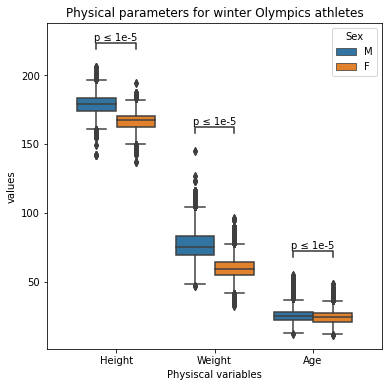

In [79]:
from statannot import add_stat_annotation

pairs = [[('Height', 'M'), ('Height', 'F')],
         [('Weight', 'M'), ('Weight', 'F')],
         [('Age', 'M'), ('Age', 'F')]]

hue_plot_params = {'data': df_long, 'x': 'Physiscal variables',
                   'y': 'values', "hue": "Sex"}


fig, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.boxplot(ax=ax, **hue_plot_params)
add_stat_annotation(ax, **hue_plot_params, box_pairs=pairs,
                    test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
plt.title('Physical parameters for winter Olympics athletes')
# plt.savefig('physical_parameters_winter_olympics_athletes.pdf', bbox_inches='tight')

### task \#15: Team vs Medal

In [80]:
# first of all let's extract both of variable into a separate table
crosstab = pd.crosstab(index=df['Team'], columns=df['Medal'])

In [81]:
# secondly, let's run Chi Square tst as both of our variables are categorical
from scipy.stats import chi2_contingency

chi_sq_result = chi2_contingency(crosstab)

In [82]:
print(f'The p-value of the Chi-squared test is: {chi_sq_result[1]:.3e}')

The p-value of the Chi-squared test is: 0.000e+00


✅ So, it is very highly likely that a type of medal correlates with a team name based on the Chi-squared test. As we have seen at the filtering step, there are many strange team names. Often country-related names have indexes (-1, -2). As teams with official country name contain more people, their chances to get medal are higher.